# 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import plotly.express as px
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.manifold import TSNE
from scipy.spatial.distance import cdist

# 2. Data Preprocessing

In [2]:
# Load the data
data = pd.read_csv('fm_male_players.csv', low_memory=False)

In [3]:
data.head()

,playerid,shortname,longname,playerpositions,overall,potential,age,heightcm,weightkg,clubteamid,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,231747,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,94,24,182,75,73.0,...,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3
1,239085,E. Haaland,Erling Braut Haaland,ST,91,94,22,195,94,10.0,...,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3
2,192985,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,32,181,75,10.0,...,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3
3,158023,L. Messi,Lionel Andrés Messi Cuccittini,"CF, CAM",90,90,36,169,67,112893.0,...,63+3,63+3,63+3,64+3,59+3,49+3,49+3,49+3,59+3,19+3
4,165153,K. Benzema,Karim Benzema,"CF, ST",90,90,35,185,81,607.0,...,64+3,64+3,64+3,64+3,60+3,55+3,55+3,55+3,60+3,18+3


In [4]:
data.tail()

,playerid,shortname,longname,playerpositions,overall,potential,age,heightcm,weightkg,clubteamid,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
180016,220806,E. Redman,Ellis Redman,CB,41,61,17,187,81,112254.0,...,38,38,38,37,40,41,41,41,40,10
180017,225509,A. Collins,Aaron Graham John Collins,ST,41,50,17,178,57,112254.0,...,30,30,30,31,32,31,31,31,32,14
180018,217591,P. Żemło,Piotr Żemło,"LM, LB",40,50,18,190,76,1873.0,...,46,46,46,48,51-1,53-3,53-3,53-3,51-1,12
180019,222947,T. Davies,Thomas Christopher Davies,CB,40,49,22,180,70,112260.0,...,36,36,36,37,39,40,40,40,39,13
180020,201197,P. Tisdale,Paul Tisdale,"CM, CAM",40,40,41,175,72,143.0,...,37,37,37,36,34,33,33,33,34,10


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180021 entries, 0 to 180020
Data columns (total 97 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   playerid                   180021 non-null  int64  
 1   shortname                  180021 non-null  object 
 2   longname                   180021 non-null  object 
 3   playerpositions            180021 non-null  object 
 4   overall                    180021 non-null  int64  
 5   potential                  180021 non-null  int64  
 6   age                        180021 non-null  int64  
 7   heightcm                   180021 non-null  int64  
 8   weightkg                   180021 non-null  int64  
 9   clubteamid                 178156 non-null  float64
 10  clubname                   178156 non-null  object 
 11  leagueid                   178156 non-null  float64
 12  leaguename                 178156 non-null  object 
 13  leaguelevel                17

In [6]:
data.describe()

,playerid,overall,potential,age,heightcm,weightkg,clubteamid,leagueid,leaguelevel,clubjerseynumber,...,mentalitycomposure,defendingmarkingawareness,defendingstandingtackle,defendingslidingtackle,goalkeepingdiving,goalkeepinghandling,goalkeepingkicking,goalkeepingpositioning,goalkeepingreflexes,goalkeepingspeed
count,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,178156.000000,178156.000000,177771.000000,178156.000000,...,147133.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,20024.000000
mean,217326.670294,65.712711,70.779581,25.138689,181.287061,75.233356,45263.728210,221.747991,1.380878,20.302297,...,57.837807,45.851456,47.759511,45.764783,16.509979,16.260136,16.129902,16.276951,16.615517,38.750300
std,35215.749284,7.018104,6.255569,4.679389,6.764179,6.999181,53516.528046,467.804515,0.750647,17.054347,...,12.305995,20.452502,21.309061,20.899683,17.661659,16.846583,16.499513,17.009393,17.971201,10.578237
min,2.000000,40.000000,40.000000,16.000000,154.000000,49.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000
25%,200759.000000,61.000000,66.000000,21.000000,176.000000,70.000000,450.000000,19.000000,1.000000,8.000000,...,50.000000,26.000000,27.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000,30.000000
50%,222734.000000,66.000000,71.000000,25.000000,181.000000,75.000000,1891.000000,56.000000,1.000000,17.000000,...,59.000000,51.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000,40.000000
75%,239858.000000,70.000000,75.000000,28.000000,186.000000,80.000000,110912.000000,308.000000,2.000000,27.000000,...,66.000000,63.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000,46.000000
max,278145.000000,94.000000,95.000000,54.000000,208.000000,110.000000,131389.000000,2149.000000,5.000000,99.000000,...,96.000000,94.000000,94.000000,95.000000,91.000000,92.000000,95.000000,92.000000,94.000000,68.000000


In [7]:
data.duplicated().sum()

1

In [8]:
data[data.duplicated()]

,playerid,shortname,longname,playerpositions,overall,potential,age,heightcm,weightkg,clubteamid,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
93019,248256,M. Sanyor,Meshari Sanyor,GK,52,71,18,178,70,112392.0,...,18+2,18+2,18+2,18+2,18+2,18+2,18+2,18+2,18+2,51+2


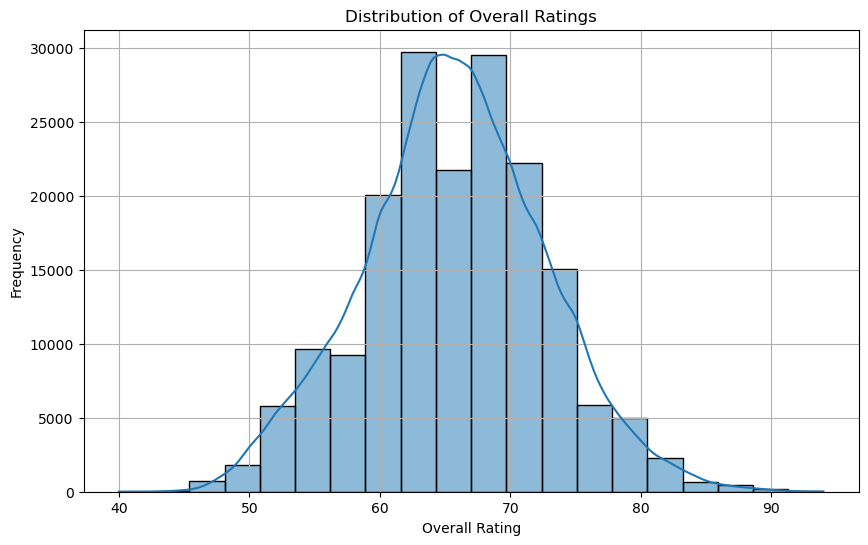

In [9]:
# Plotting the distribution of the 'overall' column
plt.figure(figsize=(10, 6))
sns.histplot(data['overall'], bins=20, kde=True)
plt.title('Distribution of Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

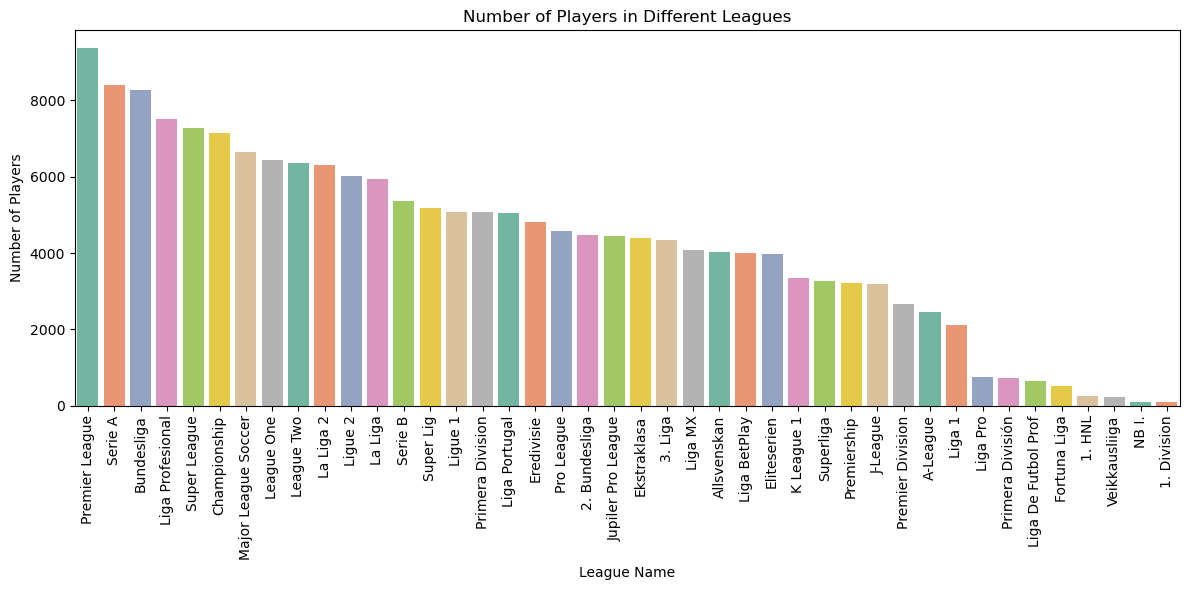

In [10]:
league_counts = data['leaguename'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=league_counts.index, y=league_counts.values, palette="Set2")
plt.title('Number of Players in Different Leagues')
plt.xlabel('League Name')
plt.ylabel('Number of Players')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [11]:
# List of columns to drop
columns_to_drop = [
    'clubjerseynumber', 'nationteamid', 'nationposition', 
    'nationjerseynumber', 'bodytype', 'leaguelevel', 'ls', 'st', 'rs', 'lw', 'lf', 
    'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 
    'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk'
]

# Drop the specified columns
data = data.drop(columns=columns_to_drop)

# Verify the columns have been dropped
print(data.columns)

Index(['playerid', 'shortname', 'longname', 'playerpositions', 'overall',
       'potential', 'age', 'heightcm', 'weightkg', 'clubteamid', 'clubname',
       'leagueid', 'leaguename', 'clubposition', 'nationalityid',
       'nationalityname', 'preferredfoot', 'weakfoot', 'skillmoves',
       'internationalreputation', 'workrate', 'playertags', 'playertraits',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attackingcrossing', 'attackingfinishing', 'attackingheadingaccuracy',
       'attackingshortpassing', 'attackingvolleys', 'skilldribbling',
       'skillcurve', 'skillfkaccuracy', 'skilllongpassing', 'skillballcontrol',
       'movementacceleration', 'movementsprintspeed', 'movementagility',
       'movementreactions', 'movementbalance', 'powershotpower',
       'powerjumping', 'powerstamina', 'powerstrength', 'powerlongshots',
       'mentalityaggression', 'mentalityinterceptions', 'mentalitypositioning',
       'mentalityvision', 'mentalitypenaltie

In [12]:
# Check for missing values
missing_values = data.isnull().sum()

# Display the columns with the most missing values
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(ascending=False)

playertags            166103
goalkeepingspeed      159997
playertraits           98216
mentalitycomposure     32888
pace                   20024
shooting               20024
passing                20024
dribbling              20024
defending              20024
physic                 20024
clubteamid              1865
clubname                1865
leagueid                1865
leaguename              1865
clubposition            1865
dtype: int64

In [13]:
# Drop columns with too many missing values and non-critical for similarity analysis
columns_to_drop = ['playertags', 'playertraits', 'clubteamid', 'leagueid', 'leaguename', 
                   'clubname', 'goalkeepingspeed']
data.drop(columns=columns_to_drop, inplace=True)

# Verify the columns have been dropped
print(data.columns)

Index(['playerid', 'shortname', 'longname', 'playerpositions', 'overall',
       'potential', 'age', 'heightcm', 'weightkg', 'clubposition',
       'nationalityid', 'nationalityname', 'preferredfoot', 'weakfoot',
       'skillmoves', 'internationalreputation', 'workrate', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attackingcrossing',
       'attackingfinishing', 'attackingheadingaccuracy',
       'attackingshortpassing', 'attackingvolleys', 'skilldribbling',
       'skillcurve', 'skillfkaccuracy', 'skilllongpassing', 'skillballcontrol',
       'movementacceleration', 'movementsprintspeed', 'movementagility',
       'movementreactions', 'movementbalance', 'powershotpower',
       'powerjumping', 'powerstamina', 'powerstrength', 'powerlongshots',
       'mentalityaggression', 'mentalityinterceptions', 'mentalitypositioning',
       'mentalityvision', 'mentalitypenalties', 'mentalitycomposure',
       'defendingmarkingawareness', 'defendingstandingtackle',


In [14]:
# Impute missing values in numeric columns with median values
numeric_cols = ['shooting', 'physic', 'defending', 'dribbling', 
                'passing', 'pace', 'mentalitycomposure']
for col in numeric_cols:
    data[col].fillna(data[col].median(), inplace=True)

In [15]:
# For categorical columns, impute missing values with a placeholder
categorical_cols = ['clubposition', 'preferredfoot', 'workrate']
for col in categorical_cols:
    data[col].fillna('Unknown', inplace=True)
    
# Confirm no missing values remain
print(data.isnull().sum())

playerid                     0
shortname                    0
longname                     0
playerpositions              0
overall                      0
potential                    0
age                          0
heightcm                     0
weightkg                     0
clubposition                 0
nationalityid                0
nationalityname              0
preferredfoot                0
weakfoot                     0
skillmoves                   0
internationalreputation      0
workrate                     0
pace                         0
shooting                     0
passing                      0
dribbling                    0
defending                    0
physic                       0
attackingcrossing            0
attackingfinishing           0
attackingheadingaccuracy     0
attackingshortpassing        0
attackingvolleys             0
skilldribbling               0
skillcurve                   0
skillfkaccuracy              0
skilllongpassing             0
skillbal

# 3. K-Means Clustering Model

In [16]:
# Feature Selection: Select relevant features for kMEANS Clustering
selected_features = ['playerid', 'shortname', 'longname', 'overall', 'clubposition', 
                     'potential', 'age', 'heightcm', 'preferredfoot', 'weakfoot', 'skillmoves', 
                     'workrate', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 
                     'attackingfinishing', 'skilldribbling', 'skilllongpassing', 'skillballcontrol', 
                     'movementacceleration', 'movementsprintspeed', 'movementreactions', 'movementbalance', 
                     'powerstamina', 'powerstrength', 'mentalityaggression', 'mentalityinterceptions', 
                     'mentalitypositioning', 'mentalityvision', 'mentalitycomposure', 'defendingmarkingawareness',
                     'defendingstandingtackle', 'defendingslidingtackle', 'goalkeepingdiving', 
                     'goalkeepinghandling', 'goalkeepingkicking', 'goalkeepingpositioning', 'goalkeepingreflexes'
]

In [17]:
# Extract the relevant data
similarity_data = data[selected_features]

In [18]:
# One-hot encode categorical features
similarity_data = pd.get_dummies(similarity_data, columns=['preferredfoot', 'workrate', 'clubposition'])

In [19]:
# Display the prepared data for similarity analysis
print(similarity_data.head())

   playerid     shortname                        longname  overall  potential  \
0    231747     K. Mbappé            Kylian Mbappé Lottin       91         94   
1    239085    E. Haaland            Erling Braut Haaland       91         94   
2    192985  K. De Bruyne                 Kevin De Bruyne       91         91   
3    158023      L. Messi  Lionel Andrés Messi Cuccittini       90         90   
4    165153    K. Benzema                   Karim Benzema       90         90   

   age  heightcm  weakfoot  skillmoves  pace  ...  clubposition_RDM  \
0   24       182         4           5  97.0  ...             False   
1   22       195         3           3  89.0  ...             False   
2   32       181         5           4  72.0  ...             False   
3   36       169         4           4  80.0  ...             False   
4   35       185         4           4  79.0  ...             False   

   clubposition_RES  clubposition_RF  clubposition_RM  clubposition_RS  \
0           

In [20]:
# Drop non-numeric and id columns for clustering
clustering_data = similarity_data.drop(columns=['playerid', 'shortname', 'longname'])

In [21]:
# Standardise the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

In [22]:
# Apply the elbow method to find the optimal number of clusters
inertia = []
range_clusters = range(1, 11)
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

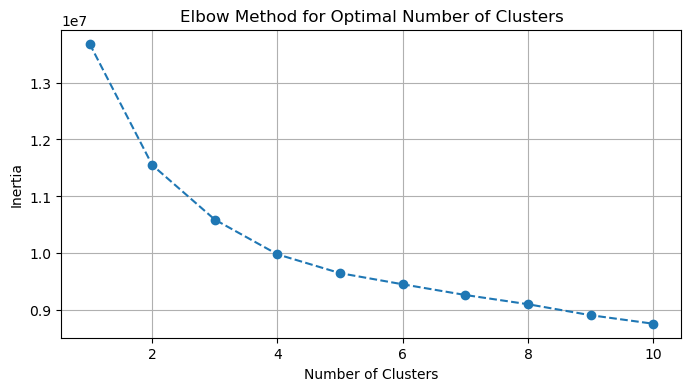

In [23]:
# Plot the elbow graph
plt.figure(figsize=(8, 4))
plt.plot(range_clusters, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [24]:
# Number of clusters from the elbow method analysis
optimal_clusters = 3

# Apply KMeans with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=0)
data['cluster_optimal'] = kmeans_optimal.fit_predict(scaled_data)

# Ensure only numeric data is included for cluster summary
numeric_columns = ['overall', 'potential', 'age', 'heightcm', 'weakfoot', 'skillmoves', 'pace', 'shooting', 
                   'passing', 'dribbling', 'defending', 'physic', 'attackingfinishing', 'skilldribbling', 
                   'skilllongpassing', 'skillballcontrol', 'movementacceleration', 'movementsprintspeed', 
                   'movementagility', 'movementreactions', 'movementbalance', 'powershotpower', 
                   'powerjumping', 'powerstamina', 'powerstrength', 'powerlongshots', 'mentalityaggression', 
                   'mentalityinterceptions', 'mentalitypositioning', 'mentalityvision', 'mentalitycomposure', 
                   'defendingmarkingawareness', 'defendingstandingtackle', 'defendingslidingtackle', 
                   'goalkeepingdiving', 'goalkeepinghandling', 'goalkeepingkicking', 'goalkeepingpositioning', 
                   'goalkeepingreflexes']

cluster_summary = data.groupby('cluster_optimal')[numeric_columns].mean()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


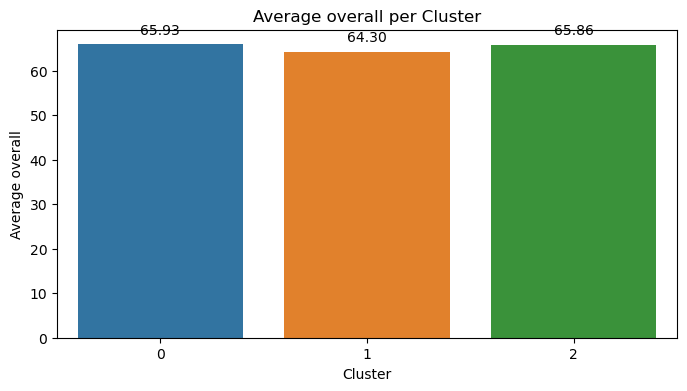

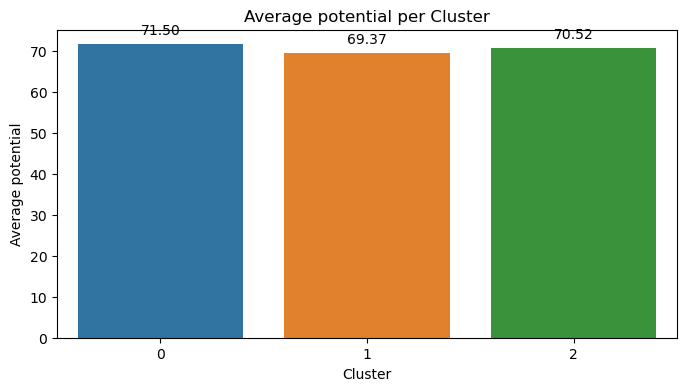

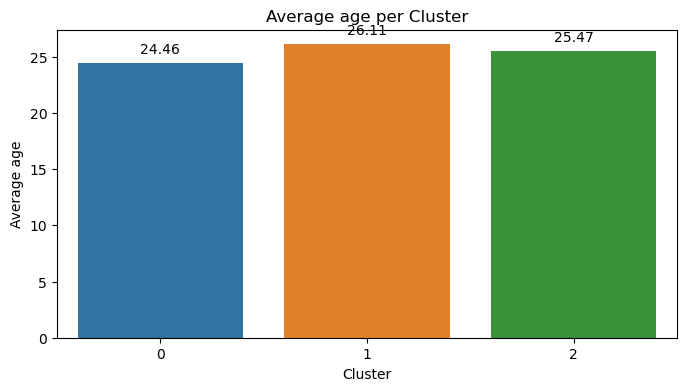

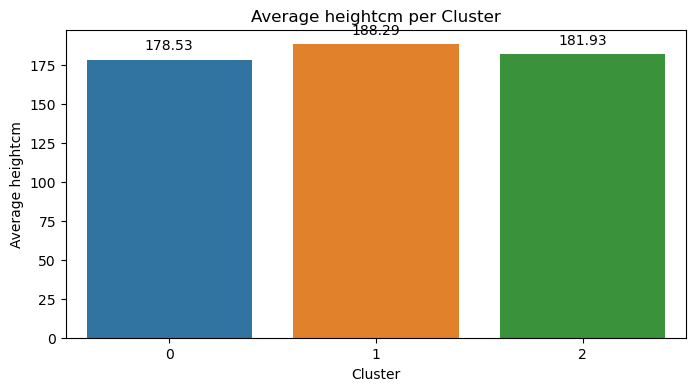

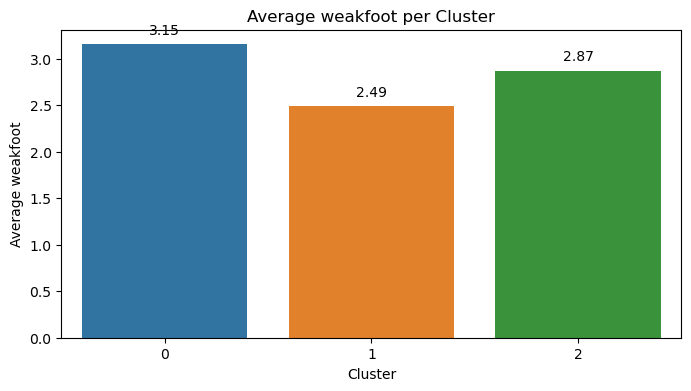

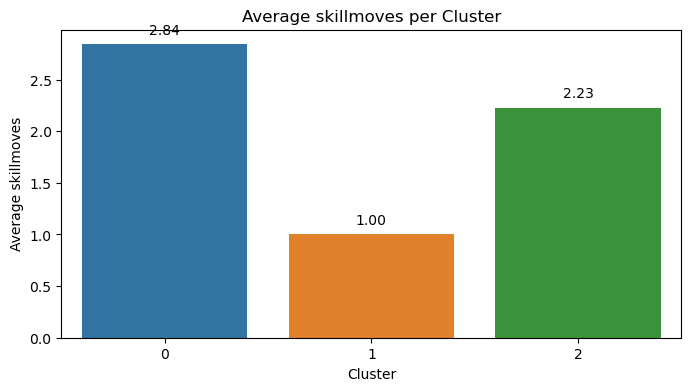

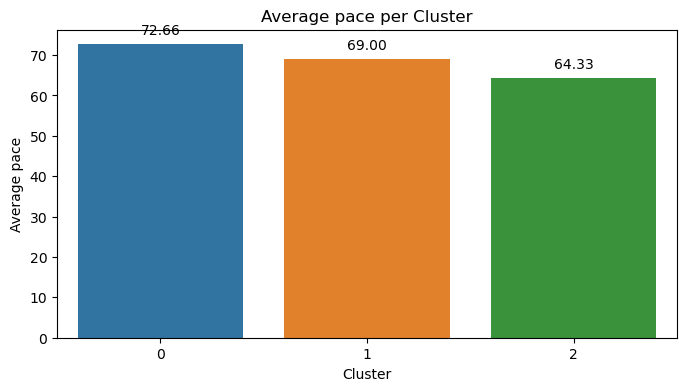

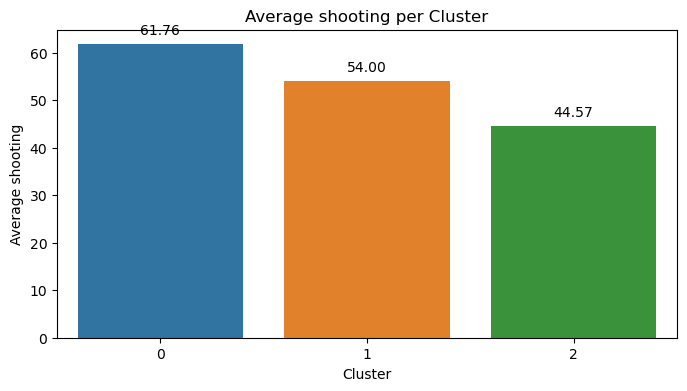

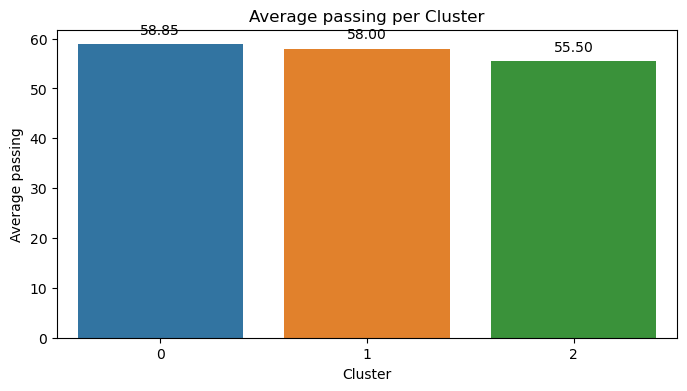

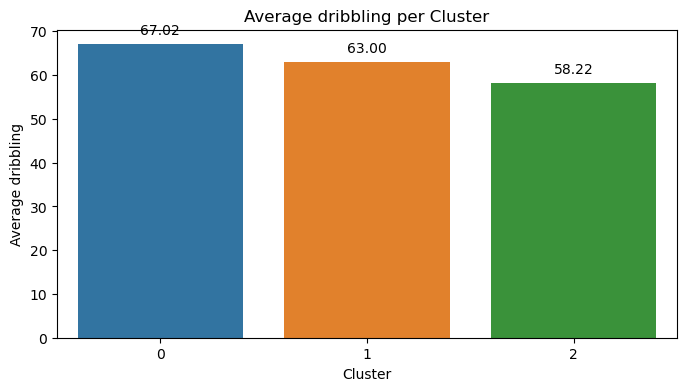

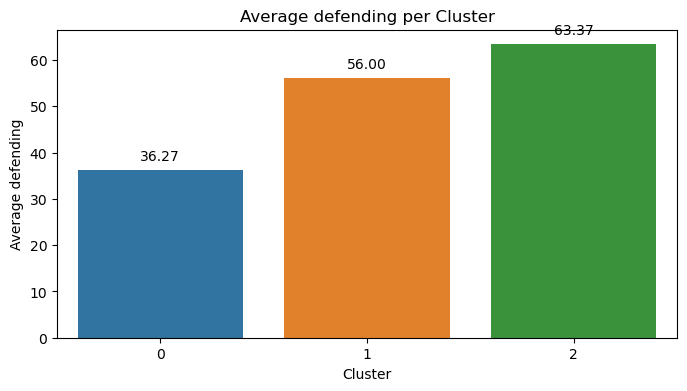

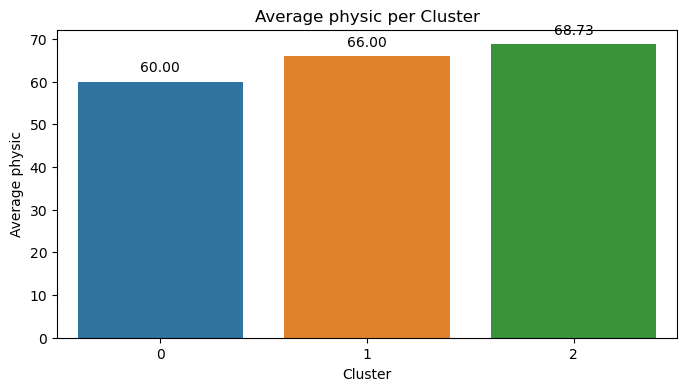

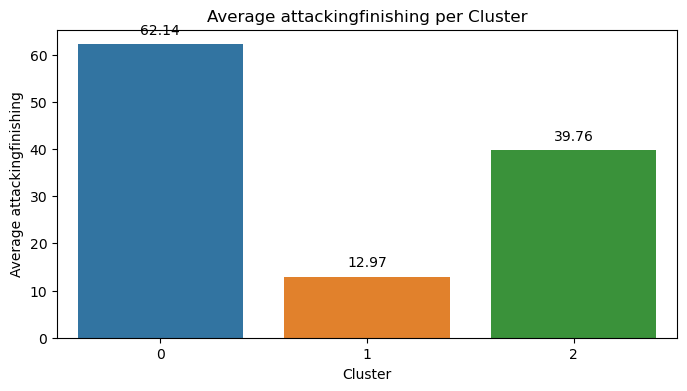

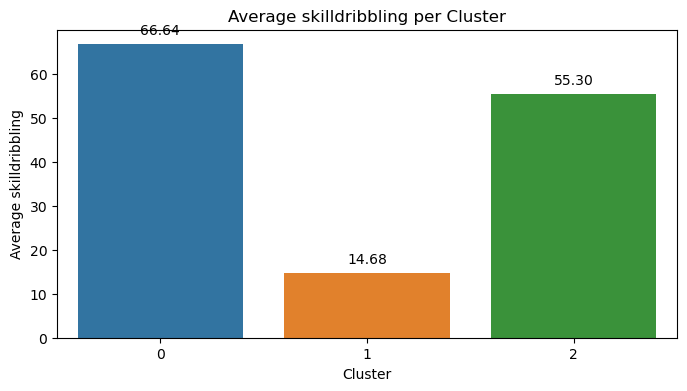

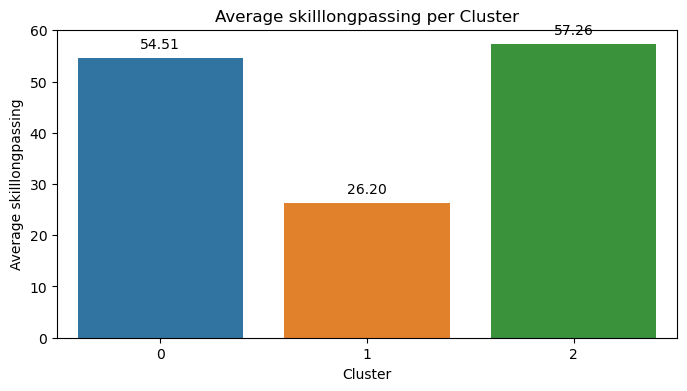

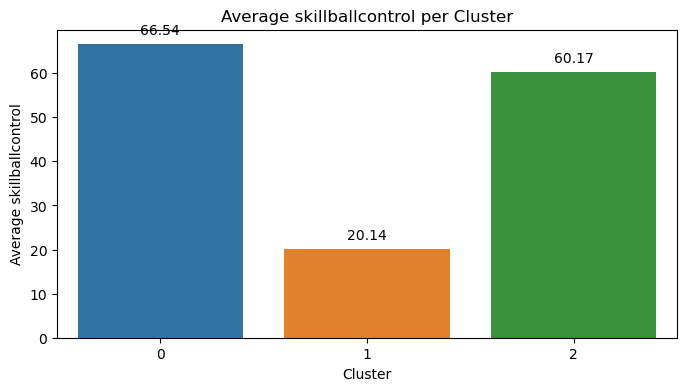

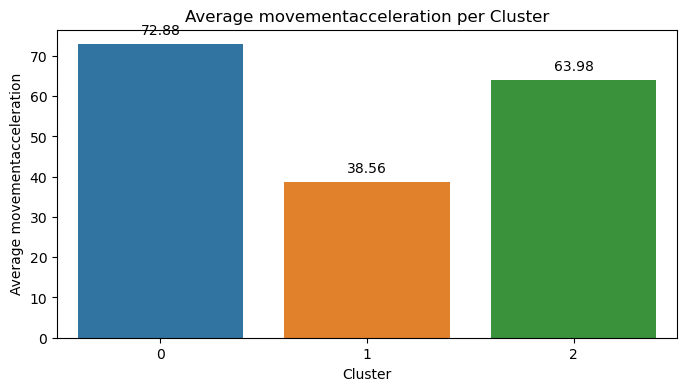

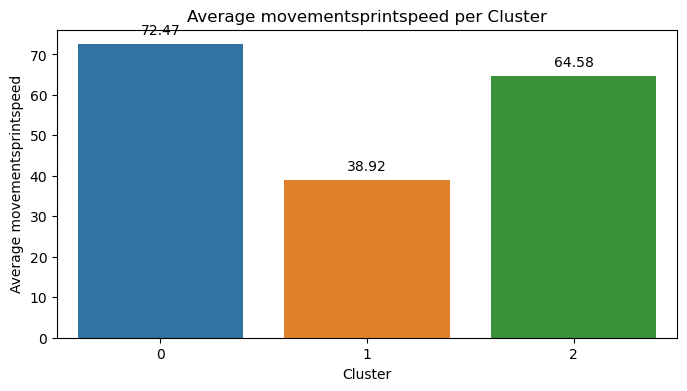

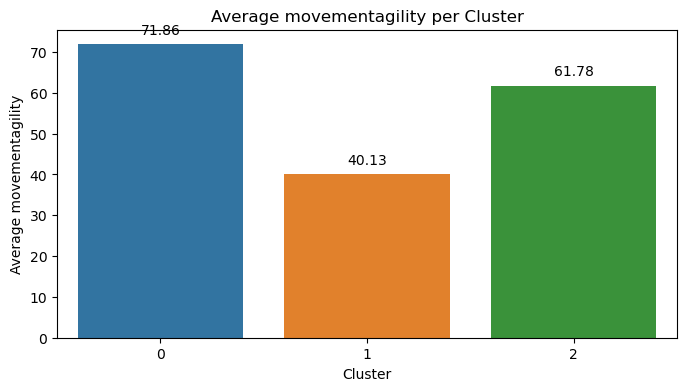

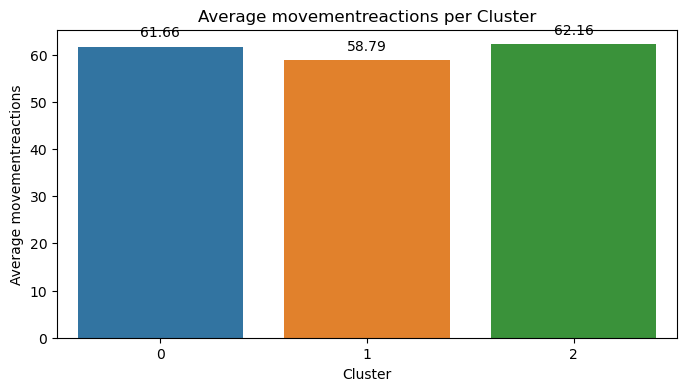

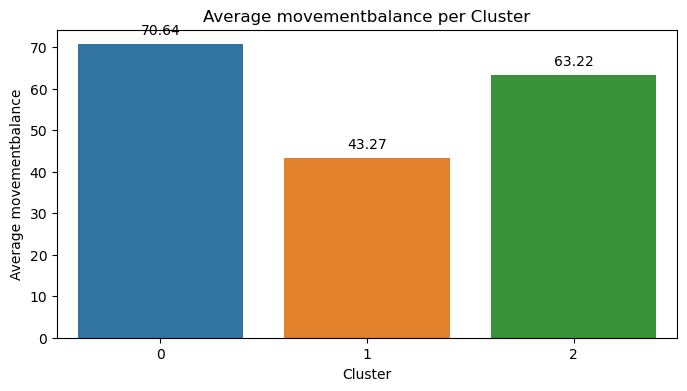

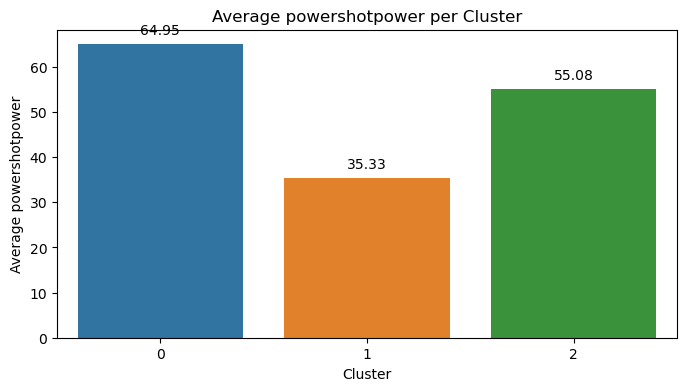

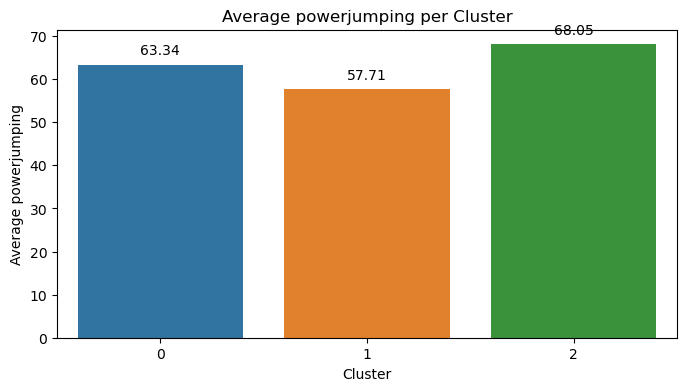

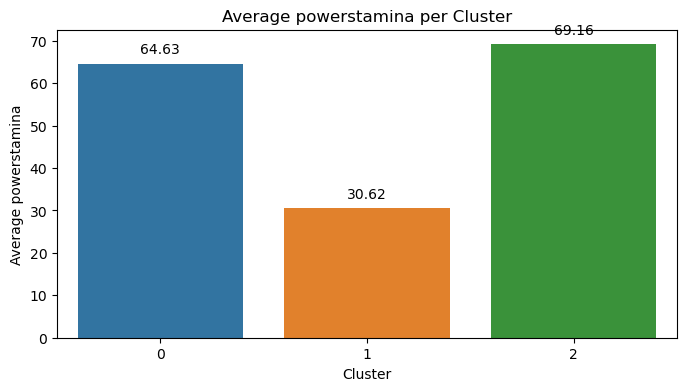

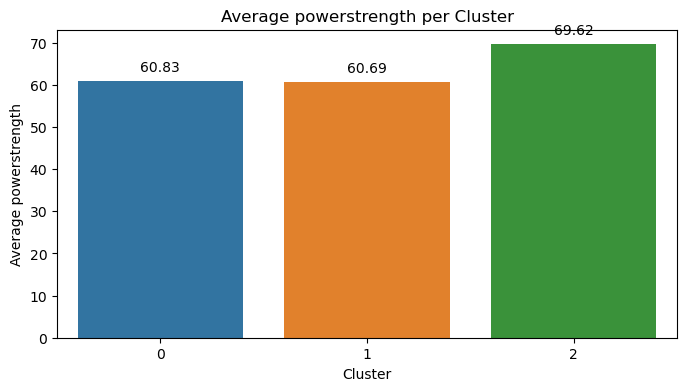

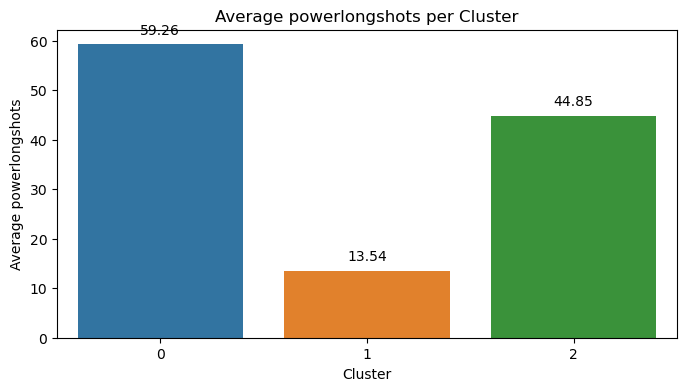

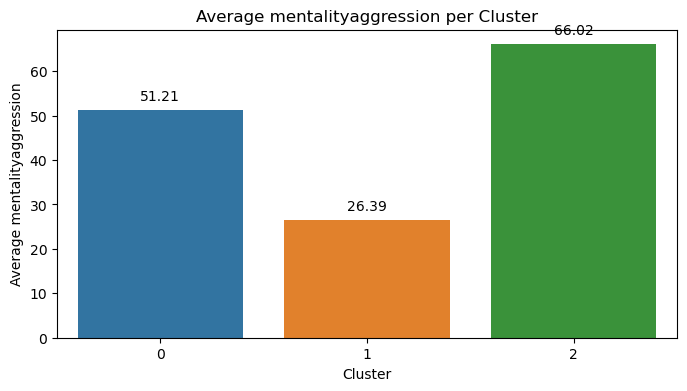

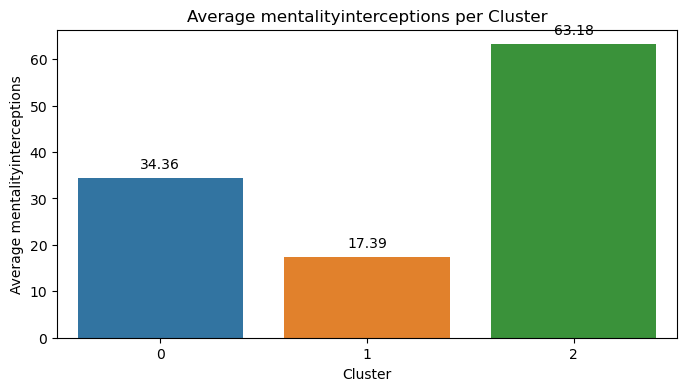

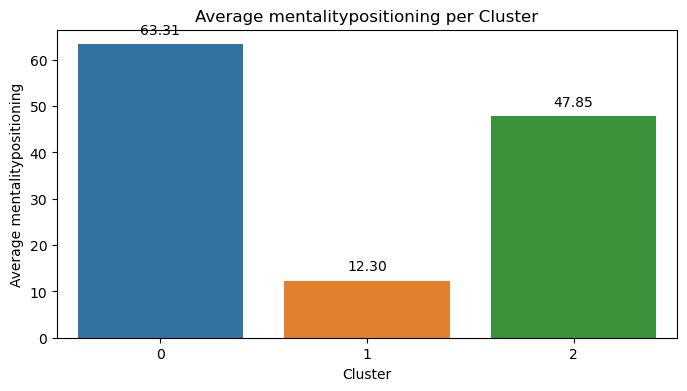

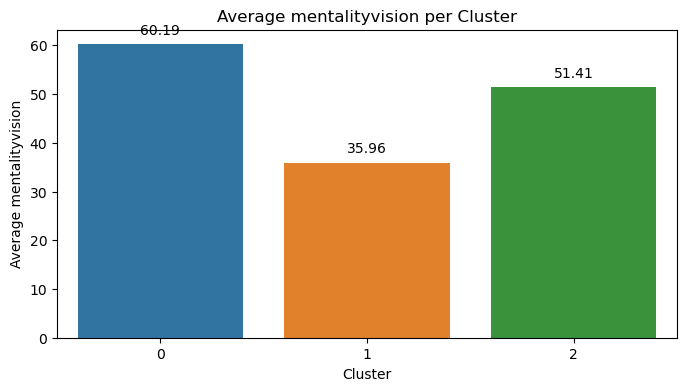

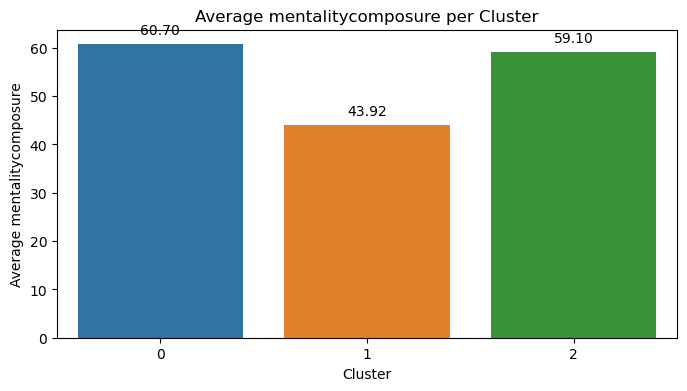

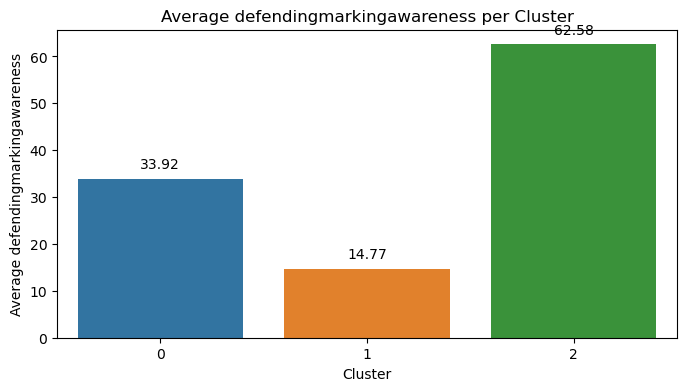

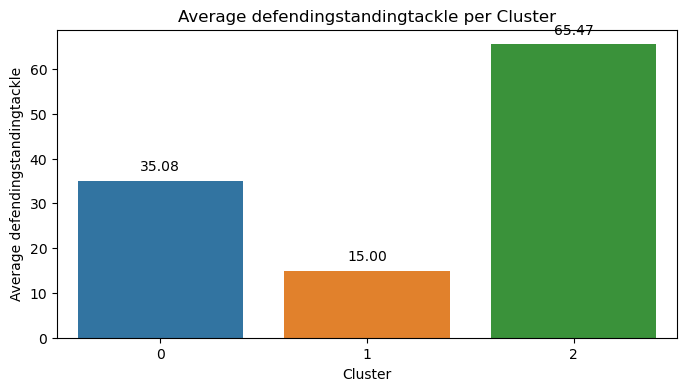

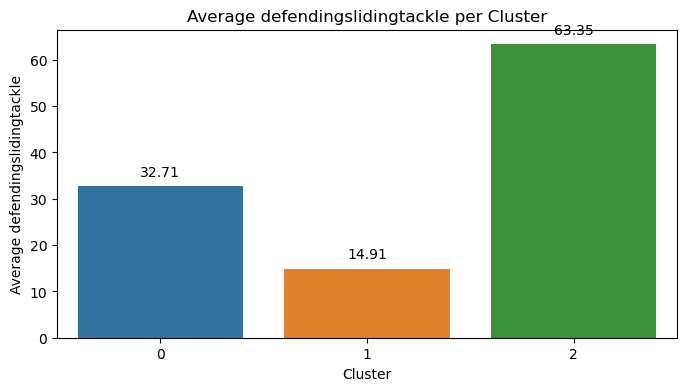

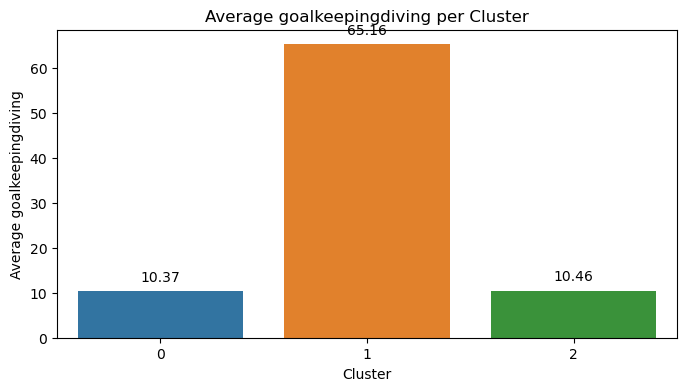

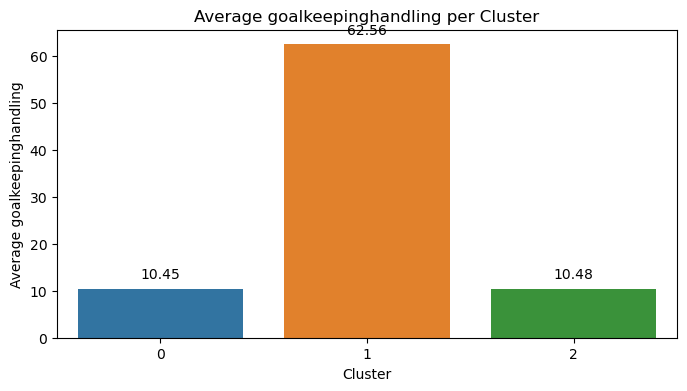

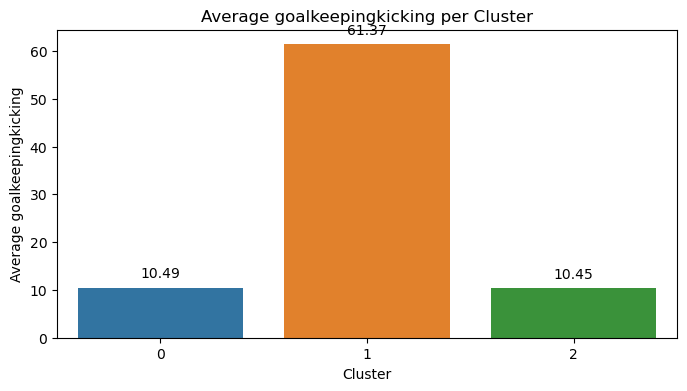

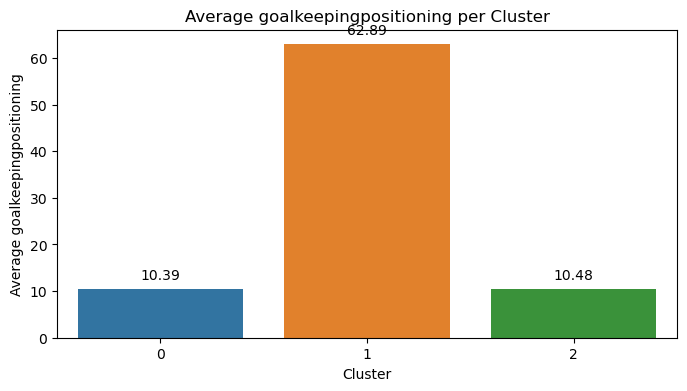

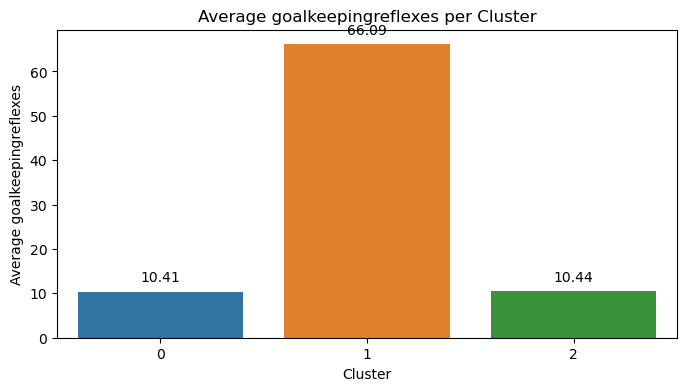

In [25]:
# Plotting bar charts for each attribute with numerical labels
for attribute in numeric_columns:
    plt.figure(figsize=(8, 4))
    barplot = sns.barplot(x=cluster_summary.index, y=cluster_summary[attribute])
    plt.title(f'Average {attribute} per Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(f'Average {attribute}')

    # Add numerical labels on the bars
    for p in barplot.patches:
        barplot.annotate(f'{p.get_height():.2f}', 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center', va='center', 
                         xytext=(0, 10), 
                         textcoords='offset points')
    
    plt.show()

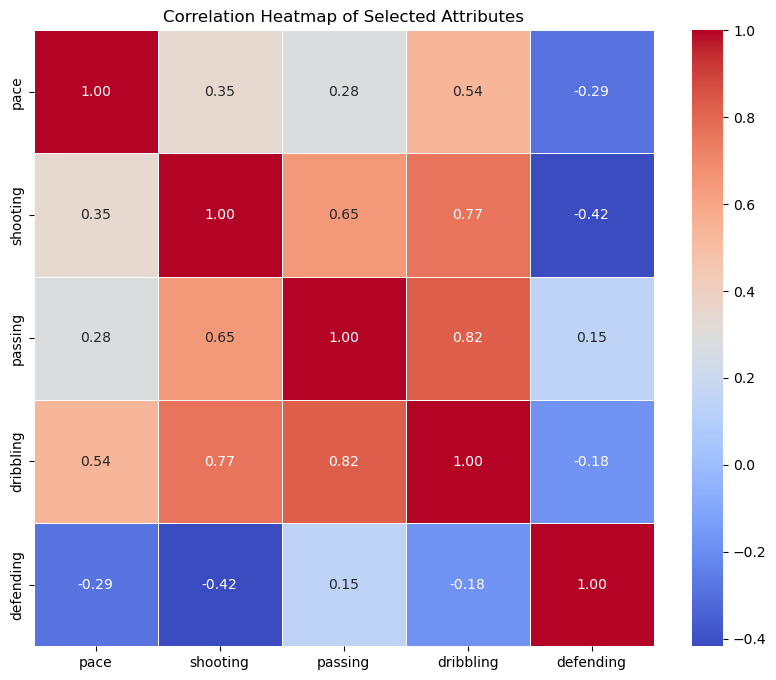

In [26]:
# These attributes will be selected for the heatmap
selected_attributes = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'cluster_optimal']

# Compute the correlation matrix only on the selected attributes (excluding 'cluster_optimal')
correlation_matrix = data[selected_attributes[:-1]].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Selected Attributes')
plt.show()

# 3.1 Dataframes for Clusters

In [27]:
#sepeate each cluters into a seperate dataframe
data0 = data[data['cluster_optimal'] == 0]
data1 = data[data['cluster_optimal'] == 1]
data2 = data[data['cluster_optimal'] == 2]

In [28]:
data0

,playerid,shortname,longname,playerpositions,overall,potential,age,heightcm,weightkg,clubposition,...,mentalitycomposure,defendingmarkingawareness,defendingstandingtackle,defendingslidingtackle,goalkeepingdiving,goalkeepinghandling,goalkeepingkicking,goalkeepingpositioning,goalkeepingreflexes,cluster_optimal
0,231747,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,94,24,182,75,LW,...,88.0,26,34,32,13,5,7,11,6,0
1,239085,E. Haaland,Erling Braut Haaland,ST,91,94,22,195,94,ST,...,87.0,38,47,29,7,14,13,11,7,0
2,192985,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,32,181,75,SUB,...,88.0,66,70,53,15,13,5,10,13,0
3,158023,L. Messi,Lionel Andrés Messi Cuccittini,"CF, CAM",90,90,36,169,67,RF,...,96.0,20,35,24,6,11,15,14,8,0
4,165153,K. Benzema,Karim Benzema,"CF, ST",90,90,35,185,81,RS,...,90.0,43,24,18,13,11,5,5,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179991,225005,R. McManus,Ryan McManus,CM,45,60,18,178,70,SUB,...,59.0,40,43,35,14,10,5,7,13,0
179995,221352,A. Murdoch,Andrew Murdoch,CM,45,57,19,175,77,RES,...,59.0,32,40,34,11,10,13,12,5,0
179997,216445,S. Noble,Sean Noble,"CM, RM",45,55,18,183,75,SUB,...,59.0,31,35,35,7,14,11,6,11,0
180009,220549,L. Davies,Liam Davies,"LM, ST",43,56,17,183,70,SUB,...,59.0,25,25,25,7,14,11,12,13,0


In [29]:
data1

,playerid,shortname,longname,playerpositions,overall,potential,age,heightcm,weightkg,clubposition,...,mentalitycomposure,defendingmarkingawareness,defendingstandingtackle,defendingslidingtackle,goalkeepingdiving,goalkeepinghandling,goalkeepingkicking,goalkeepingpositioning,goalkeepingreflexes,cluster_optimal
6,192119,T. Courtois,Thibaut Nicolas Marc Courtois,GK,90,90,31,199,96,SUB,...,66.0,20,18,16,85,89,76,90,93,1
9,212831,Alisson,Alisson Ramsés Becker,GK,89,90,30,193,91,GK,...,66.0,15,19,16,86,85,85,90,89,1
13,192448,M. ter Stegen,Marc-André ter Stegen,GK,89,89,31,187,85,GK,...,70.0,25,13,10,86,85,89,86,91,1
19,210257,Ederson,Ederson Santana de Moraes,GK,88,89,29,188,86,GK,...,70.0,29,15,8,86,82,91,86,86,1
22,200389,J. Oblak,Jan Oblak,GK,88,88,30,188,87,GK,...,68.0,27,14,18,85,90,78,86,87,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180007,224829,H. Reynolds,Harry Reynolds,GK,44,50,18,178,73,SUB,...,59.0,25,25,25,46,40,40,38,52,1
180010,194372,E. Taşkıran,Mahmut Ertuğrul Taşkıran,GK,43,49,24,191,83,GK,...,59.0,25,25,25,40,47,53,44,41,1
180011,11728,B. Richardson,Barry Richardson,GK,43,43,44,185,77,SUB,...,59.0,25,25,25,35,53,21,57,31,1
180013,220939,L. Pilling,Luke Pilling,GK,42,54,16,180,69,RES,...,59.0,25,25,25,41,42,41,42,45,1


In [30]:
data2

,playerid,shortname,longname,playerpositions,overall,potential,age,heightcm,weightkg,clubposition,...,mentalitycomposure,defendingmarkingawareness,defendingstandingtackle,defendingslidingtackle,goalkeepingdiving,goalkeepinghandling,goalkeepingkicking,goalkeepingpositioning,goalkeepingreflexes,cluster_optimal
10,231866,Rodri,Rodrigo Hernández Cascante,"CDM, CM",89,90,27,191,82,RCM,...,85.0,88,87,78,10,10,7,14,8,2
11,239818,Rúben Dias,Rúben dos Santos Gato Alves Dias,CB,89,90,26,187,82,LCB,...,81.0,91,91,87,7,8,13,7,12,2
14,200145,Casemiro,Carlos Henrique Venancio Casimiro,CDM,89,89,31,185,84,RCM,...,85.0,90,89,88,13,14,16,12,12,2
15,203376,V. van Dijk,Virgil van Dijk,CB,89,89,31,193,92,LCB,...,89.0,90,91,86,13,10,13,11,11,2
17,239053,F. Valverde,Federico Santiago Valverde Dipetta,"CM, RW",88,92,24,182,78,RCM,...,84.0,79,85,79,6,10,6,15,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180014,222997,M. Maier,Marcus Maier,CM,42,54,18,174,70,SUB,...,59.0,31,25,35,15,6,14,10,7,2
180016,220806,E. Redman,Ellis Redman,CB,41,61,17,187,81,RES,...,59.0,38,40,35,12,6,15,8,6,2
180018,217591,P. Żemło,Piotr Żemło,"LM, LB",40,50,18,190,76,RES,...,59.0,54,52,51,8,14,7,10,9,2
180019,222947,T. Davies,Thomas Christopher Davies,CB,40,49,22,180,70,RES,...,59.0,36,34,35,15,13,6,11,9,2


In [31]:
# Function to compute statistics for each cluster
def compute_cluster_statistics(cluster_data, cluster_name):
    stats = cluster_data[numeric_columns].describe().transpose()
    stats['median'] = cluster_data[numeric_columns].median()
    stats['iqr'] = stats['75%'] - stats['25%']
    stats['cluster'] = cluster_name
    return stats

# Compute statistics for each cluster
stats_data0 = compute_cluster_statistics(data0, 'Cluster 0')
stats_data1 = compute_cluster_statistics(data1, 'Cluster 1')
stats_data2 = compute_cluster_statistics(data2, 'Cluster 2')

# Combine the statistics into a single DataFrame
combined_stats = pd.concat([stats_data0, stats_data1, stats_data2])

# Reorder columns for better readability
combined_stats = combined_stats[['cluster', 'mean', 'median', 'std', 'min', '25%', '50%', '75%', 'max', 'iqr']]

# Display the combined statistics
print(combined_stats)

                          cluster        mean  median       std    min    25%  \
overall                 Cluster 0   65.932673    66.0  7.070820   41.0   61.0   
potential               Cluster 0   71.499260    71.0  6.289335   48.0   67.0   
age                     Cluster 0   24.456664    24.0  4.457541   16.0   21.0   
heightcm                Cluster 0  178.531249   178.0  6.398028  154.0  174.0   
weakfoot                Cluster 0    3.151682     3.0  0.658425    1.0    3.0   
...                           ...         ...     ...       ...    ...    ...   
goalkeepingdiving       Cluster 2   10.458757    10.0  3.209507    1.0    8.0   
goalkeepinghandling     Cluster 2   10.479732    10.0  3.174456    1.0    8.0   
goalkeepingkicking      Cluster 2   10.448683    10.0  3.255187    1.0    8.0   
goalkeepingpositioning  Cluster 2   10.481000    10.0  3.199603    1.0    8.0   
goalkeepingreflexes     Cluster 2   10.436096    10.0  3.197209    1.0    8.0   

                          5

# 3.1.1 Distributions Across Clusters

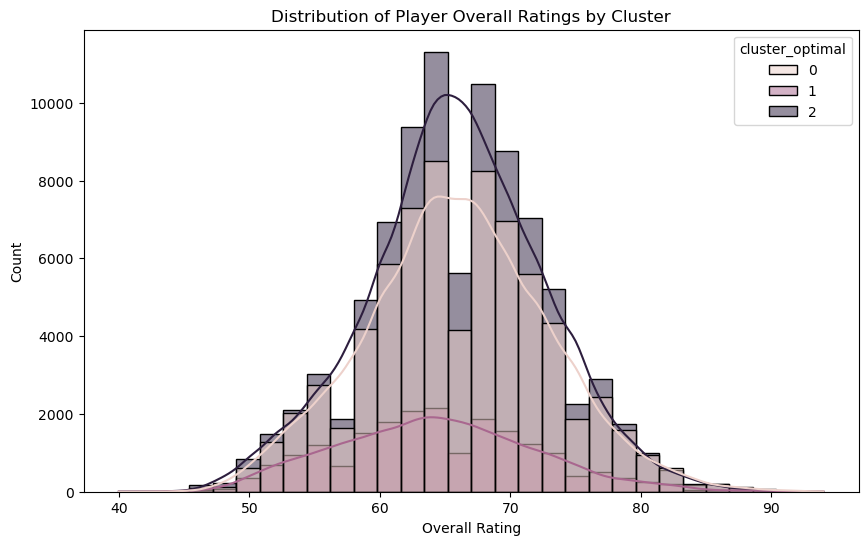

In [32]:
# Plotting Visualisations

# Distribution of Player Overall Ratings by Cluster
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='overall', hue='cluster_optimal', kde=True, bins=30)
plt.title('Distribution of Player Overall Ratings by Cluster')
plt.xlabel('Overall Rating')
plt.ylabel('Count')
plt.show()

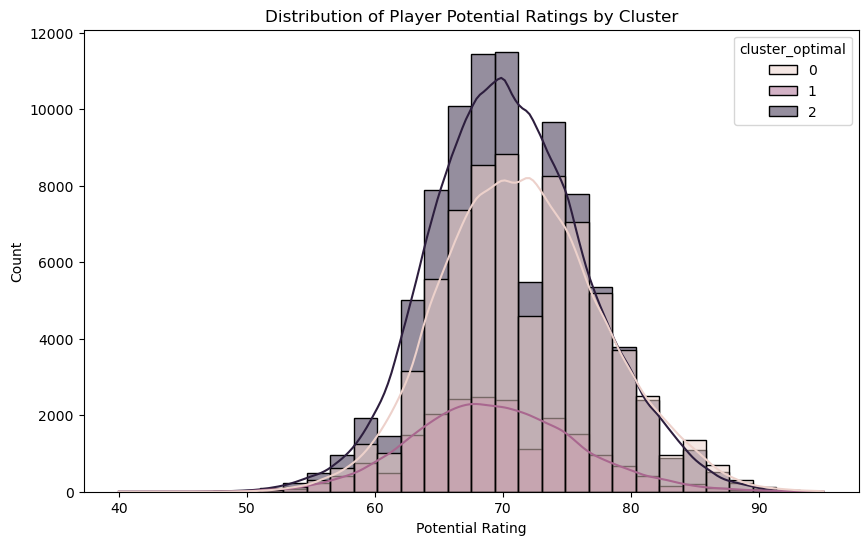

In [33]:
# Distribution of Player Potential Ratings by Cluster
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='potential', hue='cluster_optimal', kde=True, bins=30)
plt.title('Distribution of Player Potential Ratings by Cluster')
plt.xlabel('Potential Rating')
plt.ylabel('Count')
plt.show()

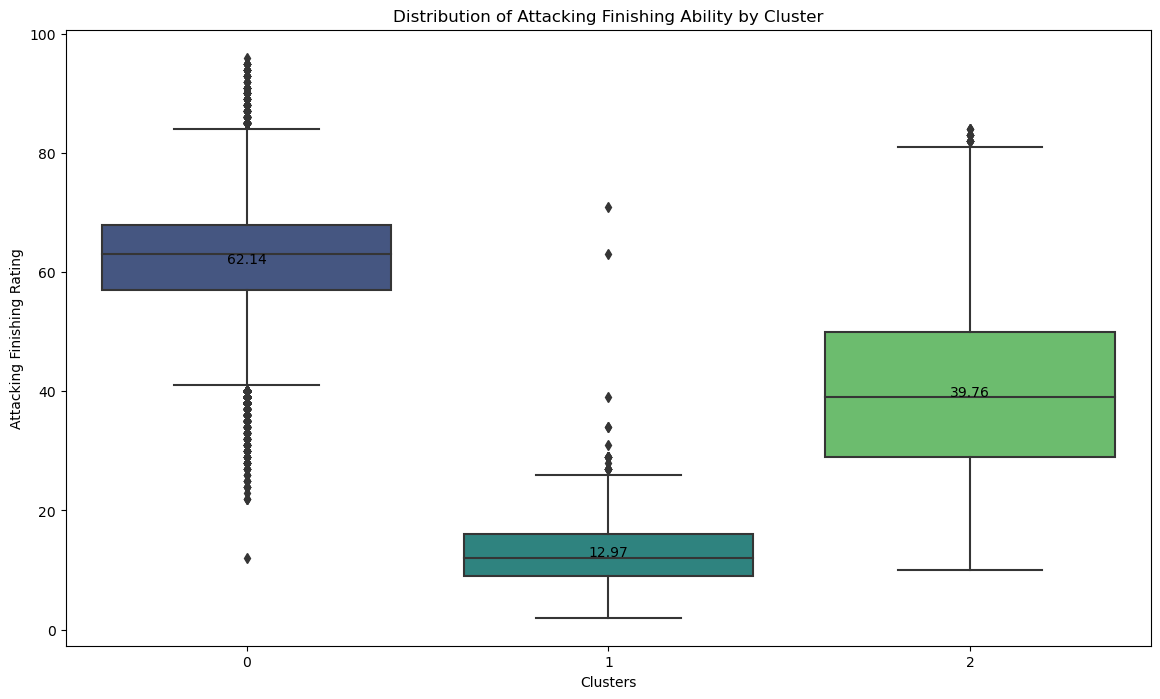

In [34]:
# Distribution of Attacking Finishing Ability by Cluster
plt.figure(figsize=(14, 8))
ax = sns.boxplot(data=data, x='cluster_optimal', y='attackingfinishing', palette='viridis')
plt.title('Distribution of Attacking Finishing Ability by Cluster')
plt.xlabel('Clusters')
plt.ylabel('Attacking Finishing Rating')

# Adding mean annotations
means = data.groupby('cluster_optimal')['attackingfinishing'].mean()
for cluster, mean in means.items():
    ax.text(cluster, mean, f'{mean:.2f}', horizontalalignment='center', verticalalignment='center', color='black')

plt.show()

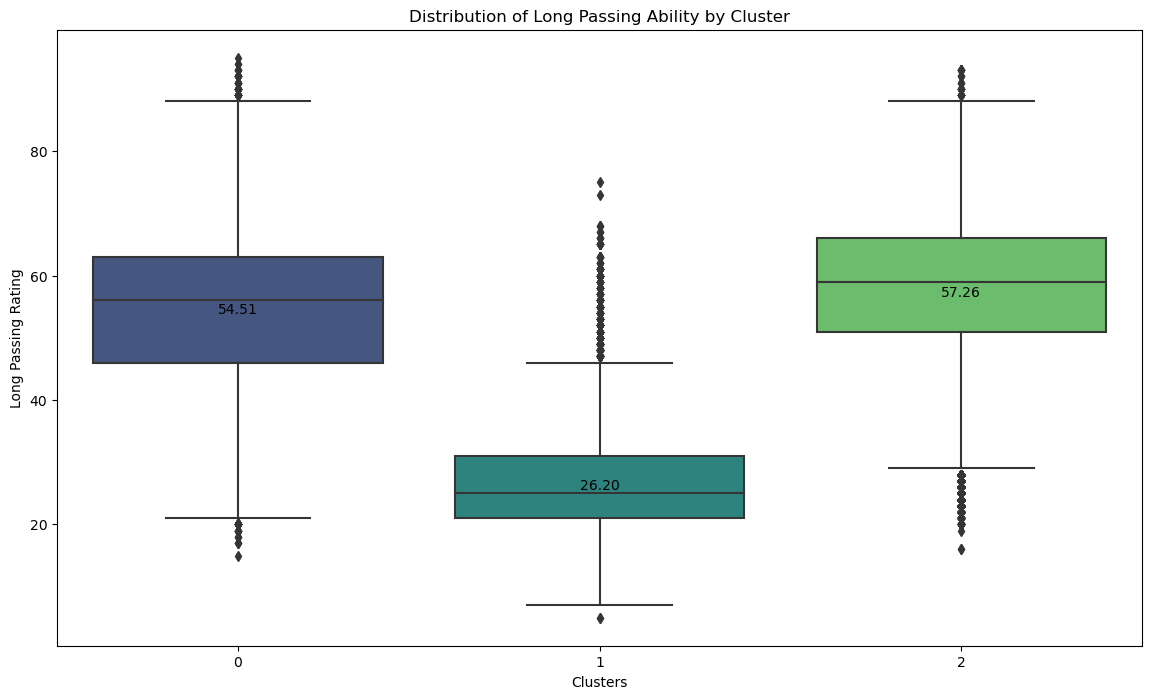

In [35]:
# Distribution of Passing Ability by Cluster
plt.figure(figsize=(14, 8))
ax = sns.boxplot(data=data, x='cluster_optimal', y='skilllongpassing', palette='viridis')
plt.title('Distribution of Long Passing Ability by Cluster')
plt.xlabel('Clusters')
plt.ylabel('Long Passing Rating')

# Adding mean annotations
means = data.groupby('cluster_optimal')['skilllongpassing'].mean()
for cluster, mean in means.items():
    ax.text(cluster, mean, f'{mean:.2f}', horizontalalignment='center', verticalalignment='center', color='black')

plt.show()

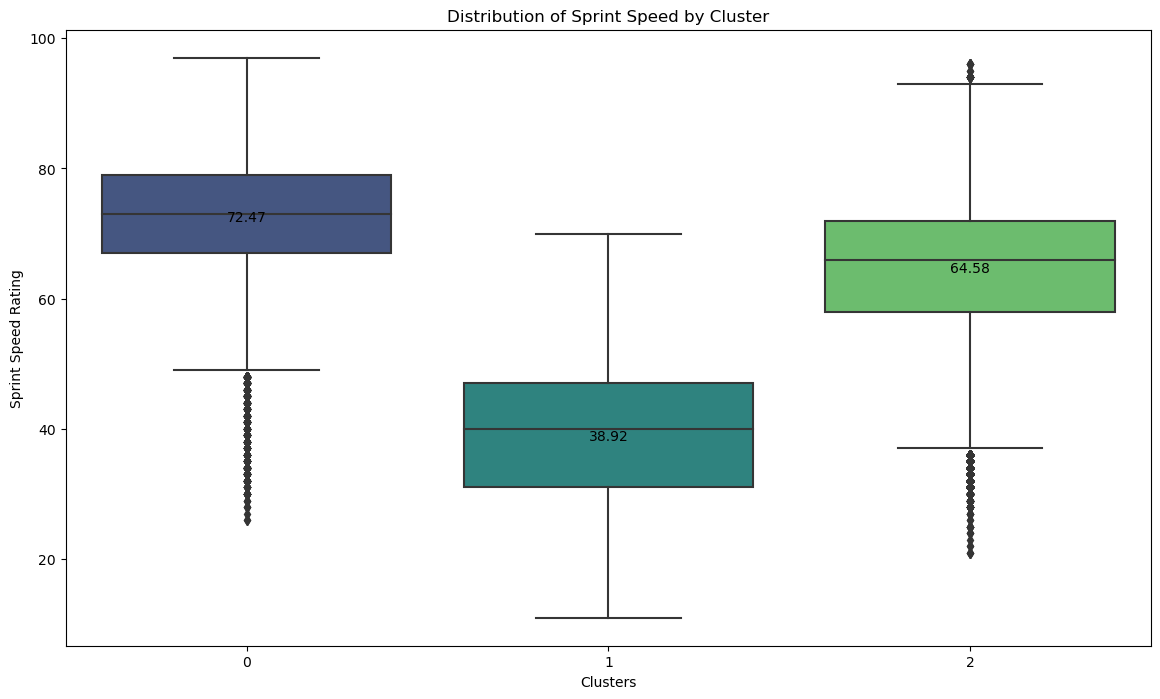

In [36]:
# Distribution of Speed Ability by Cluster
plt.figure(figsize=(14, 8))
ax = sns.boxplot(data=data, x='cluster_optimal', y='movementsprintspeed', palette='viridis')
plt.title('Distribution of Sprint Speed by Cluster')
plt.xlabel('Clusters')
plt.ylabel('Sprint Speed Rating')

# Adding mean annotations
means = data.groupby('cluster_optimal')['movementsprintspeed'].mean()
for cluster, mean in means.items():
    ax.text(cluster, mean, f'{mean:.2f}', horizontalalignment='center', verticalalignment='center', color='black')

plt.show()

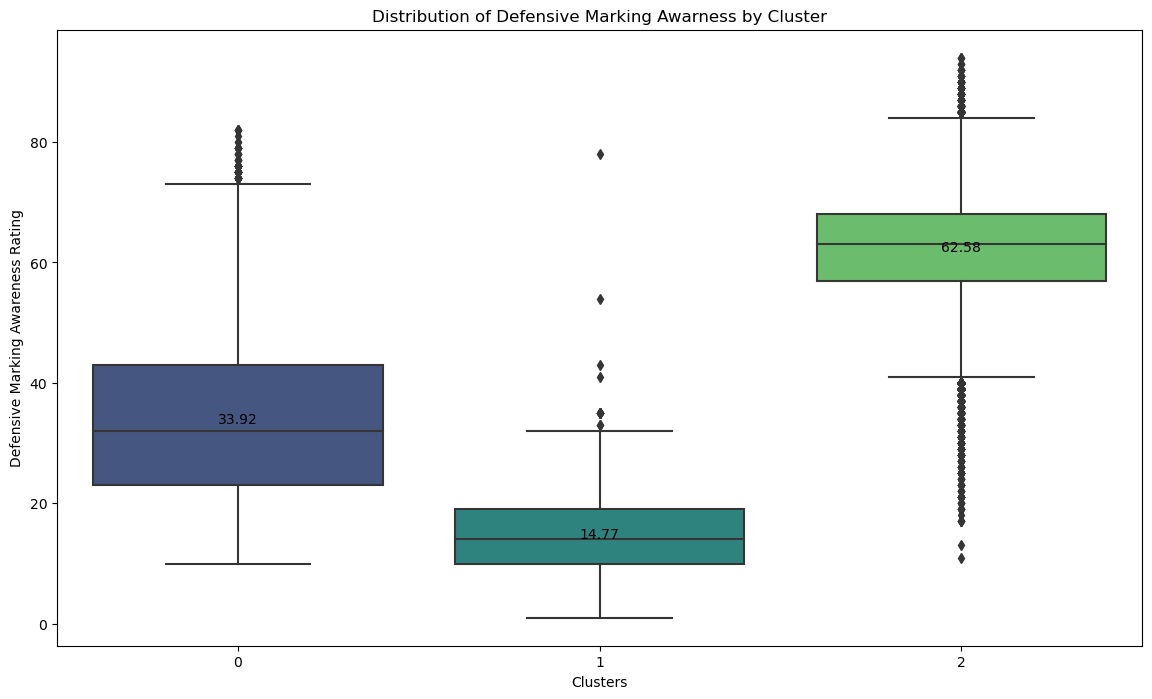

In [37]:
# Distribution of Defensive Ability by Cluster
plt.figure(figsize=(14, 8))
ax = sns.boxplot(data=data, x='cluster_optimal', y='defendingmarkingawareness', palette='viridis')
plt.title('Distribution of Defensive Marking Awarness by Cluster')
plt.xlabel('Clusters')
plt.ylabel('Defensive Marking Awareness Rating')

# Adding mean annotations
means = data.groupby('cluster_optimal')['defendingmarkingawareness'].mean()
for cluster, mean in means.items():
    ax.text(cluster, mean, f'{mean:.2f}', horizontalalignment='center', verticalalignment='center', color='black')

plt.show()

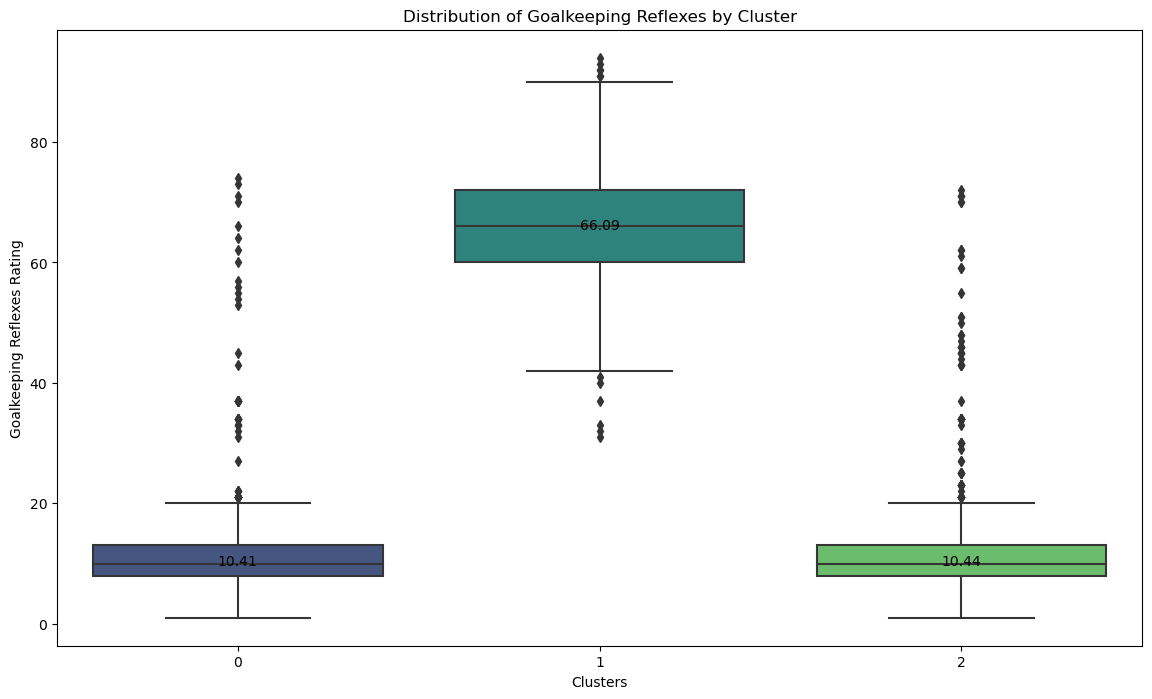

In [38]:
# Distribution of Goalkeeping Reflexes Ability by Cluster
plt.figure(figsize=(14, 8))
ax = sns.boxplot(data=data, x='cluster_optimal', y='goalkeepingreflexes', palette='viridis')
plt.title('Distribution of Goalkeeping Reflexes by Cluster')
plt.xlabel('Clusters')
plt.ylabel('Goalkeeping Reflexes Rating')

# Adding mean annotations
means = data.groupby('cluster_optimal')['goalkeepingreflexes'].mean()
for cluster, mean in means.items():
    ax.text(cluster, mean, f'{mean:.2f}', horizontalalignment='center', verticalalignment='center', color='black')

plt.show()

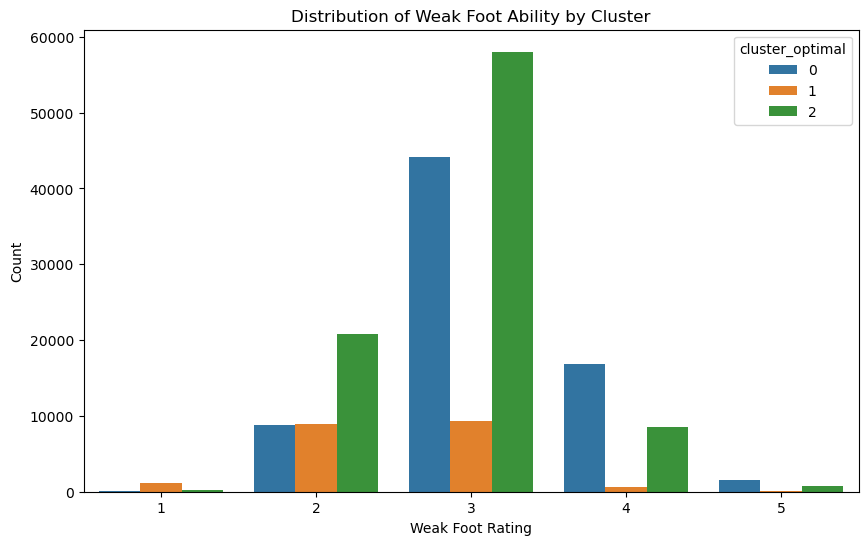

In [39]:
# Distribution of Weak Foot Ability by Cluster
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='weakfoot', hue='cluster_optimal')
plt.title('Distribution of Weak Foot Ability by Cluster')
plt.xlabel('Weak Foot Rating')
plt.ylabel('Count')
plt.show()

# 4. PCA For Dimensionality Reduction

In [40]:
# Dimensionality Reduction using PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_data)

In [41]:
# Add PCA results to DataFrame
data['pca1'] = pca_result[:, 0]
data['pca2'] = pca_result[:, 1]
data['pca3'] = pca_result[:, 2]

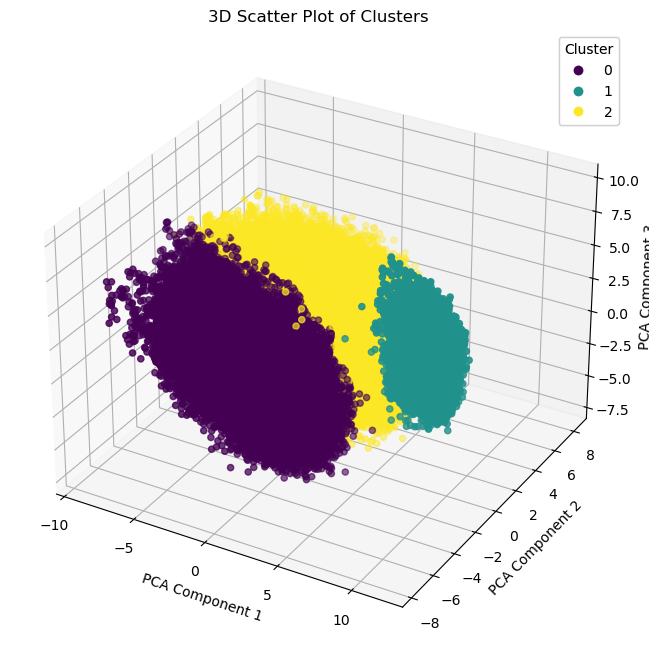

In [42]:
# Alternatively, Matplotlib 3D Scatter Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(data['pca1'], data['pca2'], data['pca3'],
                     c=data['cluster_optimal'], cmap='viridis', marker='o')

# Add color bar
legend1 = ax.legend(*scatter.legend_elements(), title='Cluster')
ax.add_artist(legend1)

# Labels and title
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title('3D Scatter Plot of Clusters')

plt.show()

# 5. Model Evaluation

In [43]:
# Evaluation Metrics Computation (Using subsampling)
# Subsampling to reduce computation time
sample_size = 10000
indices = np.random.choice(scaled_data.shape[0], sample_size, replace=False)
sampled_scaled_data = scaled_data[indices]
sampled_labels = data['cluster_optimal'].iloc[indices]

# Calculate evaluation metrics on the sample
silhouette_avg_sampled = silhouette_score(sampled_scaled_data, sampled_labels)
davies_bouldin_avg_sampled = davies_bouldin_score(sampled_scaled_data, sampled_labels)
calinski_harabasz_avg_sampled = calinski_harabasz_score(sampled_scaled_data, sampled_labels)

# Print evaluation metrics for the sampled data
print(f"Silhouette Score (Sampled): {silhouette_avg_sampled:.4f}")
print(f"Davies-Bouldin Index (Sampled): {davies_bouldin_avg_sampled:.4f}")
print(f"Calinski-Harabasz Index (Sampled): {calinski_harabasz_avg_sampled:.4f}")

Silhouette Score (Sampled): 0.1495
Davies-Bouldin Index (Sampled): 2.3397
Calinski-Harabasz Index (Sampled): 1500.4319


# 6. Finding Similar (Closest) Players based on t-SNE Coordinates

In [44]:
# Reduce dimensions with PCA before t-SNE
pca = PCA(n_components=50)
pca_result = pca.fit_transform(scaled_data)

# Subsample the data for t-SNE
sample_size = 10000 
sampled_pca_result = pca_result[:sample_size]

# Applying t-SNE to reduce dimensions to 2 for visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(sampled_pca_result)

# Optionally, store the results in a DataFrame for easier plotting
tsne_df = pd.DataFrame(tsne_result, columns=['tsne1', 'tsne2'])

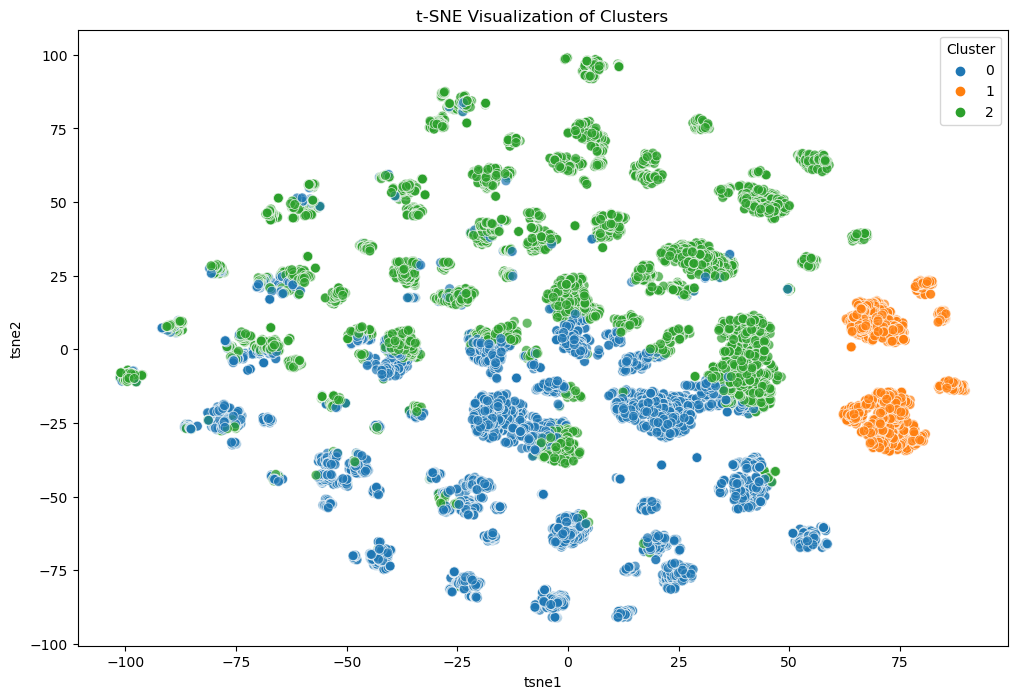

In [45]:
# Plot t-SNE results
plt.figure(figsize=(12, 8))
sns.scatterplot(data=tsne_df, x='tsne1', y='tsne2', hue=data['cluster_optimal'].iloc[:sample_size], palette='tab10', s=50, alpha=0.7)
plt.title('t-SNE Visualization of Clusters')
plt.legend(title='Cluster')
plt.show()

In [46]:
# Function to find the closest players
def find_closest_players(tsne_data, original_data, sample_size):
    df_results = pd.DataFrame()
    
    clusters = original_data['cluster_optimal'].iloc[:sample_size].unique()
    
    for cluster in clusters:
        # Select rows from the original data and tsne_data corresponding to the cluster
        cluster_indices = original_data[original_data['cluster_optimal'] == cluster].index
        cluster_indices = cluster_indices.intersection(tsne_data.index)
        df_cluster = original_data.loc[cluster_indices]
        coords = tsne_data.loc[cluster_indices][['tsne1', 'tsne2']].values
        names = df_cluster['shortname'].tolist()
        
        distances = cdist(coords, coords)
        np.fill_diagonal(distances, np.inf)  # Ensure diagonal isn't the closest
        indices = np.argpartition(distances, 10)[:, :10]
        closest_names = np.take(names, indices)
        
        closest_names_df = pd.DataFrame(closest_names, columns=[f'closest_{i}' for i in range(10)])
        closest_names_df['index_tracker'] = df_cluster.index
        
        df_results = pd.concat([df_results, closest_names_df])
    
    return df_results

In [48]:
# Applying the function to find the closest players
closest_players_df = find_closest_players(tsne_df, data, sample_size)

# Merge the closest players DataFrame with the original DataFrame
data_with_closest = data.iloc[:sample_size].merge(closest_players_df, left_index=True, right_on='index_tracker')

# Save the DataFrame with the closest players to a CSV file
closest_players_filename = 'similar_players.csv'
data_with_closest.to_csv(closest_players_filename, index=False)

In [49]:
# Load Similar players data

# Load the data
similar_players = pd.read_csv('similar_players.csv', low_memory=False)

In [50]:
similar_players.head()

,playerid,shortname,longname,playerpositions,overall,potential,age,heightcm,weightkg,clubposition,...,closest_1,closest_2,closest_3,closest_4,closest_5,closest_6,closest_7,closest_8,closest_9,index_tracker
0,231747,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,94,24,182,75,LW,...,M. Rashford,L. Haraslín,Oyarzabal,Bernard,H. Son,K. Kvaratskhelia,L. Díaz,Kim Dae Won,A. Živković,0
1,239085,E. Haaland,Erling Braut Haaland,ST,91,94,22,195,94,ST,...,C. Immobile,R. Kolo Muani,A. Isak,R. Lewandowski,M. Nzola,Richarlison,A. Sørloth,M. Antonio,E. Ünal,1
2,192985,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,32,181,75,SUB,...,I. Perišić,Marcos Llorente,R. Baku,C. Jones,Lucas Vázquez,G. Castrovilli,F. Nmecha,Álex Berenguer,A. Lallana,2
3,158023,L. Messi,Lionel Andrés Messi Cuccittini,"CF, CAM",90,90,36,169,67,RF,...,M. Götze,K. Onisiwo,A. Colpani,M. Rasmussen,R. Malinovskyi,J. Hofmann,A. Candreva,F. González Metilli,E. Kılınç,3
4,165153,K. Benzema,Karim Benzema,"CF, ST",90,90,35,185,81,RS,...,M. Taremi,L. Stindl,K. Gameiro,S. Zuber,Rodrygo,D. Vlahović,A. Griezmann,Iago Aspas,G. Scamacca,4
